In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd()
LIB_PATH = PROJECT_ROOT / "lib"
LIB_PATH_STR = str(LIB_PATH)

print(f"LIB_PATH: {LIB_PATH_STR}")

if LIB_PATH_STR not in sys.path:
    sys.path.append(LIB_PATH_STR)



# Import your library
from plot.plot_lib import (             # type: ignore
    bluishColorList,
    plot_pivot_bar,
    plot_hist_hue

)
from clean.clean_lib import (           # type: ignore
    null_data, 
    most_frequent_values,number_unique_values ) 

LIB_PATH: /Users/leexin/Documents/_DataScientist/udemy/python_datascience/course_content/_deploy_2_git/lib


In [2]:
import pandas as pd

train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [3]:
display(train_df.head(3))

display(test_df.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Missing data, Most Frequent Items, Unique Values

In [4]:
null_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Null,0,0,0,0,0,177,0,0,0,0,687,2
Percent Null,0.0,0.0,0.0,0.0,0.0,19.9,0.0,0.0,0.0,0.0,77.1,0.2
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [5]:
most_frequent_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequency,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total non-null,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [6]:
number_unique_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total Non-Null,891,891,891,891,891,714,891,891,891,891,204,889
Number of uniques,891,2,3,891,2,88,7,7,681,248,147,3



<div style="margin-left:7%;width:80%;">

### **Combining Train and Test Sets with a Dataset Identifier**

We merge the original Titanic training and test datasets into a single DataFrame so that we can apply consistent data cleaning, feature engineering, and exploratory analysis across both sets. After concatenation, we create a new column called `"set"` to keep track of each row’s origin:

* All rows are initially labeled `"train"`.
* Rows that belong to the original test dataset are identified because their `Survived` value is missing (`NaN`).
* These rows are relabeled as `"test"`.

This allows us to work with a unified dataset while still being able to distinguish train from test during analysis or modeling.

</div>

In [7]:
all_df = pd.concat([train_df,test_df],axis=0)
all_df["set"] = "train"

all_df.loc[all_df.Survived.isna(),"set"] = "test"

display(all_df.sample(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,train
618,619,1.0,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,train
128,129,1.0,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,train



<div style="margin-left:7%;width:80%;">

## ⭐ **3. General Introduction — Train–Test Distribution Comparison**


</div>


## 3A. Sex

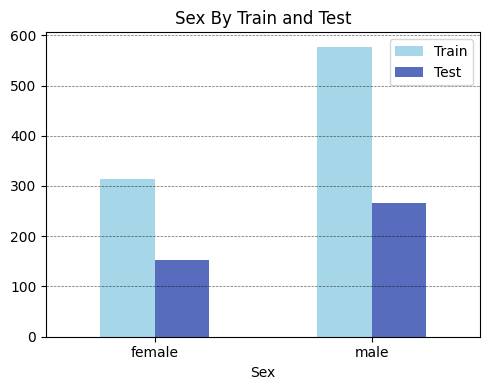

In [8]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df['set'])
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sex By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.5,
                         title=title,legendLabels=labels)

plt.show()

## 3B. Pclass (Passenger Class)

set,train,test
Pclass,,
1,216,107
2,184,93
3,491,218


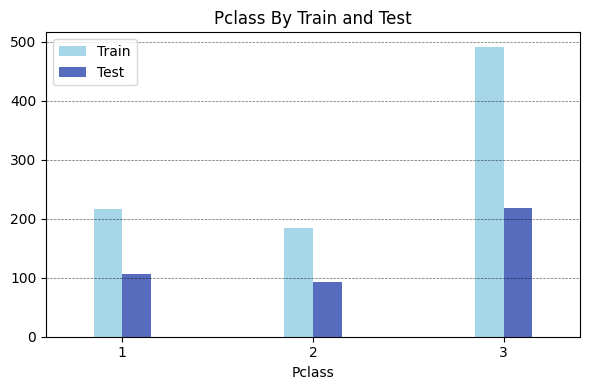

In [9]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["set"]) 
df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Pclass By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.3,
                         title=title,legendLabels=labels)
df_crosstab

## 3C. SibSp (Sibling Spouse)

set,train,test
SibSp,,
0,608,283
1,209,110
2,28,14
3,16,4
4,18,4
5,5,1
8,7,2


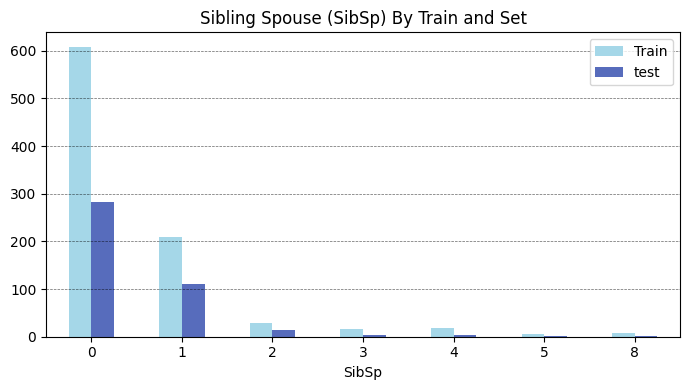

In [10]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["set"])

df_crosstab = df_crosstab.reindex(columns=["train","test"])

title = "Sibling Spouse (SibSp) By Train and Set"
labels = ["Train","test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)

df_crosstab

## 3D. Parch (Parent Child)

set,train,test
Parch,,
0,678,324
1,118,52
2,80,33
3,5,3
4,4,2
5,5,1
6,1,1
9,0,2


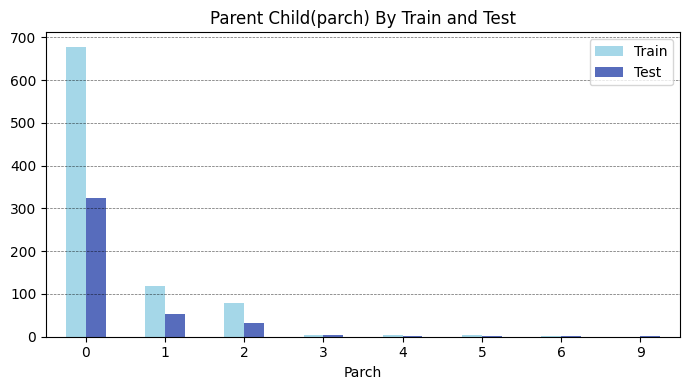

In [11]:
df_crosstab = pd.crosstab(index=all_df["Parch"],columns=all_df["set"])

# reindex or reorder columns
df_crosstab = df_crosstab.reindex(columns=["train","test"])

display(df_crosstab)

title = "Parent Child(parch) By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)
plt.show()

## 3E. Embarked

In [12]:
train_df.loc[train_df.Embarked.isna(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
# Drop rows where Embarked is missing
all_df = all_df.dropna(subset=["Embarked"]).reset_index(drop=True)
train_df = train_df.dropna(subset=["Embarked"]).reset_index(drop=True)


set,train,test
Embarked,,
C,168,102
Q,77,46
S,644,270


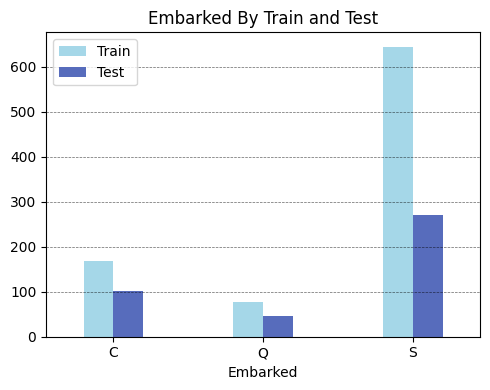

In [14]:
df_crosstab = pd.crosstab(index=all_df["Embarked"],columns=all_df["set"])
df_crosstab = df_crosstab.reindex(columns=["train","test"])
display(df_crosstab)

title = "Embarked By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.4,
                         title=title,legendLabels=labels)

plt.show()

## 3F. Age

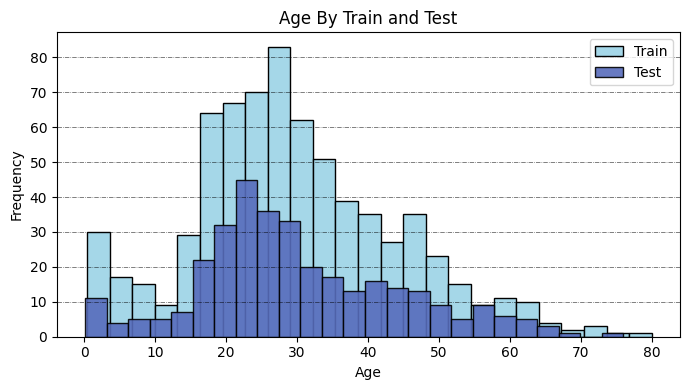

In [15]:
title = "Age By Train and Test"
labels = ["Train","Test"]

plt,_,_ = plot_hist_hue(all_df,feature="Age",hue="set",
                title=title,legendLabels=labels)
plt.show()

## 3G. Fare

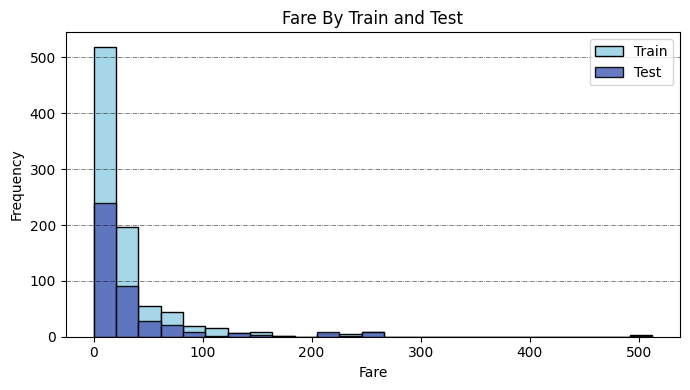

In [16]:
title = "Fare By Train and Test"
labels = ["Train","Test"]
plt,_,_ = plot_hist_hue(all_df,feature="Fare",hue="set",
              title=title,legendLabels=labels)

## 4. Bivariate Analysis

### 4A. Sex and Survived

Survived,0.0,1.0
Sex,,
female,81,231
male,468,109


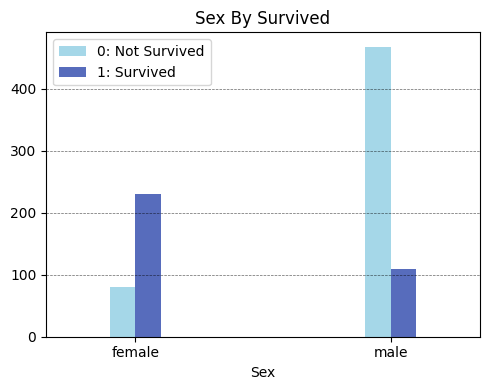

In [17]:
df_crosstab = pd.crosstab(index=all_df["Sex"],columns=all_df["Survived"])

display(df_crosstab)
title="Sex By Survived"
labels=["0: Not Survived","1: Survived"]

plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(5,4),width=0.2,
                           title=title,legendLabels=labels)

plt.show()

### 4B. Pclass and Survived

Survived,0.0,1.0
Pclass,,
1,80,134
2,97,87
3,372,119


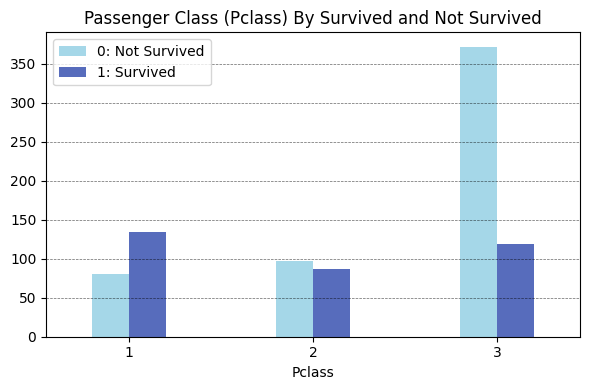

In [23]:
df_crosstab = pd.crosstab(index=all_df["Pclass"],columns=all_df["Survived"])
display(df_crosstab)

title = "Passenger Class (Pclass) By Survived and Not Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,figsize=(6,4),width=0.4,
                         title=title,legendLabels=labels)

### 4C. SipSp (Siblings or Spouse) and Survived

Survived,0.0,1.0
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


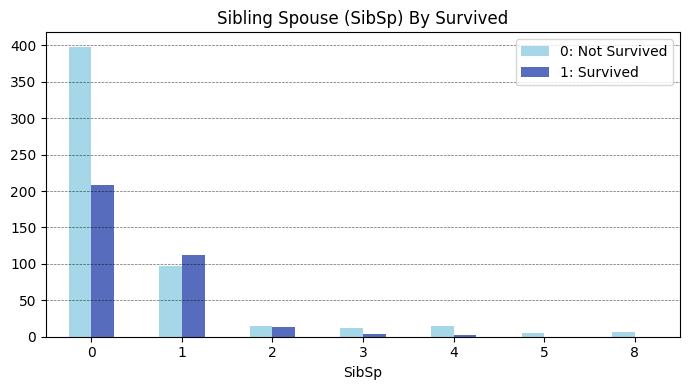

In [27]:
df_crosstab = pd.crosstab(index=all_df["SibSp"],columns=all_df["Survived"])
display(df_crosstab)

title = "Sibling Spouse (SibSp) By Survived"
labels = ["0: Not Survived","1: Survived"]
plt,_,_ = plot_pivot_bar(df_crosstab,
                         title=title,legendLabels=labels)